In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import scipy.io as sio

In [8]:
"""
data = sio.loadmat('mnist.mat')


Xtrain = data['trainX'][:10000,:].astype(int)
Xtest = data['testX'].astype(int)
ytrain =data['trainY'][0,:10000].astype(int)
ytest =  data['testY'][0,:].astype(int)

idx = np.logical_or(np.equal(ytrain,4), np.equal(ytrain,9))
Xtrain = Xtrain[idx,:]
ytrain = ytrain[idx]
ytrain[np.equal(ytrain,4)] = 1
ytrain[np.equal(ytrain,9)] = -1

idx = np.logical_or(np.equal(ytest,4), np.equal(ytest,9))
Xtest = Xtest[idx,:]
ytest = ytest[idx]
ytest[np.equal(ytest,4)] = 1
ytest[np.equal(ytest,9)] = -1


sio.savemat('mnist_binary_small.mat',{'Xtrain':Xtrain,'ytrain':ytrain,'Xtest':Xtest,'ytest':ytest})
"""

data = sio.loadmat('mnist_binary_small.mat')
Xtrain = data['Xtrain']
Xtest = data['Xtest']
ytrain = data['ytrain'][0,:]
ytest = data['ytest'][0,:]

print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)


(1958, 784) (1991, 784) (1958,) (1991,)


In [9]:
# (1958, 784) => 1958 labels and 784 features
# The initial weights are 1/m for each sample => Weights.shape (1,1958)
def get_weighted_misclass(w,y,yhat):
#     weighted training error e = sum(w[i]*y[i]!=yhat[i])
    e = np.sum(w * (y != yhat))
    if e != 0:
        a = 1/2 * np.log((1-e)/e)
    else:
        a = 1e10
    sumWeight = 0
    n = len(y)
    weights = np.zeros(n)
    for i in range(n):
        newWeight = w[i] * np.exp(-a * y[i] * yhat[i])
        weights[i] = newWeight
        sumWeight += newWeight
        
        
    weights = weights / sumWeight
    return weights

def get_misclass(y,yhat):
    return np.sum(y != yhat)/np.size(y)


def get_exp_loss(y,yhat):
    n = len(y)
    sum = 0.0
    for i in range(n):
        sum += np.exp(-(y[i]*yhat[i]))
    
      
        
    return sum/n

In [10]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

X = Xtrain
y = ytrain

In [11]:
trainMisRate = np.zeros((100))
testMisRate = np.zeros((100))
expLosses = np.zeros((100))
minTrainMisRate = np.array([np.Inf, -1])
minTestMisRate = np.array([np.Inf, -1])
minExpLosses = np.array([np.Inf, -1])

In [12]:
initWeight = np.full((1958), 1./1958)
initWeight

array([0.00051073, 0.00051073, 0.00051073, ..., 0.00051073, 0.00051073,
       0.00051073])

In [13]:
clf = DecisionTreeClassifier(max_depth=1, random_state=1234)
clf = clf.fit(X, y, sample_weight = initWeight)

In [14]:
trainMisRate_ada = np.zeros((100))
testMisRate_ada = np.zeros((100))
expLosses_ada = np.zeros((100))
minTrainMisRate_ada = np.array([np.Inf, -1])
minTestMisRate_ada = np.array([np.Inf, -1])
minExpLosses_ada = np.array([np.Inf, -1])

In [15]:
w = initWeight
for i in range(100):
    clf = DecisionTreeClassifier(max_depth=1, random_state=1234)
    clf = clf.fit(X, y, sample_weight = w)
    #    Train misclassification rate
    yTrainPred = clf.predict(Xtrain)
    train_misclass = get_misclass(ytrain, yTrainPred)
    trainMisRate_ada[i] = train_misclass
    if train_misclass < minTrainMisRate_ada[0]:
        minTrainMisRate_ada[0] = train_misclass
        minTrainMisRate_ada[1] = i
    
#     Test misclassification rate
    ypred = clf.predict(Xtest)
    testMisRate_ada[i] = get_misclass(ytest, ypred)
    if testMisRate_ada[i] < minTestMisRate_ada[0]:
        minTestMisRate_ada[0] = testMisRate_ada[i]
        minTestMisRate_ada[1] = i
#     Train exponential loss
    expLosses_ada[i] = get_exp_loss(ytrain, yTrainPred)
    if expLosses_ada[i] < minExpLosses_ada[0]:
        minExpLosses_ada[0] = expLosses_ada[i]
        minExpLosses_ada[1] = i
    w = get_weighted_misclass(w, y, yTrainPred)
    

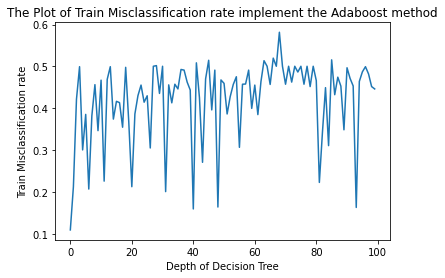

In [16]:
plt.plot(np.r_[0:100], trainMisRate_ada)

plt.xlabel("Depth of Decision Tree")
plt.ylabel("Train Misclassification rate")
plt.title("The Plot of Train Misclassification rate implement the Adaboost method")
plt.show()

In [24]:
print('When the train trees with depth ', minTrainMisRate_ada[1],' , the smallest train misclassification rate is: ', "{0:.2%}".format(minTrainMisRate_ada[0]))

When the train trees with depth  18.0  , the smallest train misclassification rate is:  0.00%


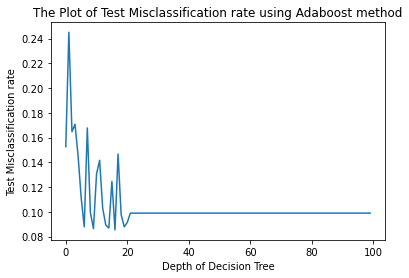

In [25]:
plt.plot(np.r_[0:100], testMisRate_ada)

plt.xlabel("Depth of Decision Tree")
plt.ylabel("Test Misclassification rate")
plt.title("The Plot of Test Misclassification rate using Adaboost method")
plt.show()

In [26]:
print('When the test trees with depth ', minTestMisRate_ada[1],' , the smallest test misclassification rate is: ', "{0:.2%}".format(minTestMisRate_ada[0]))



When the test trees with depth  16.0  , the smallest test misclassification rate is:  8.54%


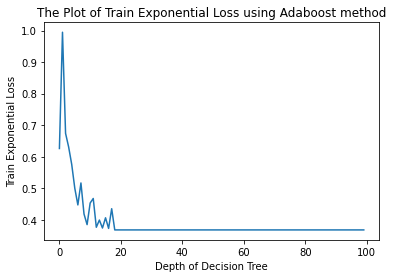

In [27]:
plt.plot(np.r_[0:100], expLosses_ada)

plt.xlabel("Depth of Decision Tree")
plt.ylabel("Train Exponential Loss")
plt.title("The Plot of Train Exponential Loss using Adaboost method")
plt.show()

In [28]:
print('When the train trees with depth ', minExpLosses_ada[1],' , the smallest train exponential loss is: ', "{0:.2%}".format(minExpLosses_ada[0]))

When the train trees with depth  18.0  , the smallest train exponential loss is:  36.79%


In [29]:
w = initWeight
e_t = np.zeros(100)
a_t = np.zeros(100)

for i in range(100):
    clf = DecisionTreeClassifier(max_depth=1, random_state=1234)
    clf = clf.fit(X, y, sample_weight = w)
    yhat = clf.predict(Xtrain)
    e = np.sum(w * (y != yhat))
    if e != 0:
        a = 1/2 * np.log((1-e)/e)
    else:
        a = 0
    a_t[i] = a
    e_t[i] = e
    w = get_weighted_misclass(w, y, yTrainPred)

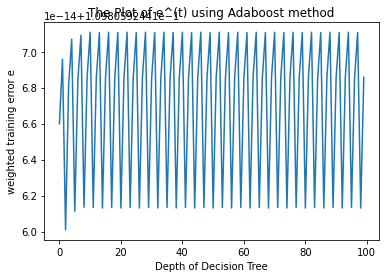

In [30]:
plt.plot(np.r_[0:100], e_t)

plt.xlabel("Depth of Decision Tree")
plt.ylabel("weighted training error e")
plt.title("The Plot of e^(t) using Adaboost method")
plt.show()

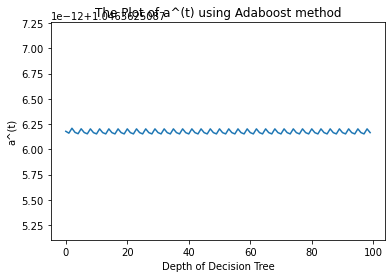

In [31]:
plt.plot(np.r_[0:100], a_t)

plt.xlabel("Depth of Decision Tree")
plt.ylabel("a^(t)")
plt.title("The Plot of a^(t) using Adaboost method")
plt.show()

In [32]:
i = np.argsort(a_t)[::-1][0]
print('When e^(t) = ', e_t[i], ', a^(t) has the largest and positive value ', a_t[i])

When e^(t) =  0.1098059244126601 , a^(t) has the largest and positive value  1.0463625086962092


In [33]:
print('When e^(t) = ', e_t[15], ', a^(t) is', a_t[15])

When e^(t) =  0.10980592441266858 , a^(t) is 1.0463625086961656
